In [2]:
!pip install -q diffusers transformers accelerate safetensors

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import os

dataset_dir = "/content/drive/MyDrive/genai_lab1_dataset"
os.makedirs(dataset_dir, exist_ok=True)
print("Saving images to:", dataset_dir)


Saving images to: /content/drive/MyDrive/genai_lab1_dataset


In [4]:
import torch
from diffusers import StableDiffusionPipeline

model_id = "runwayml/stable-diffusion-v1-5"  # popular SD model

device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16 if device == "cuda" else torch.float32
)
pipe = pipe.to(device)


Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


In [5]:
import uuid
from PIL import Image

prompts = [
    "a futuristic cityscape with neon lights at night, ultra detailed, 4k",
    "a cute cartoon robot playing guitar in a park",
    "a realistic portrait of a dog wearing sunglasses, studio lighting",
    "a fantasy castle on a floating island, bright colors, concept art",
    "a sports car racing on a mountain road at sunset"
]

images_per_prompt = 3
guidance_scale = 7.5
num_inference_steps = 30

all_paths = []

for prompt in prompts:
    print("Generating for prompt:", prompt)
    for i in range(images_per_prompt):
        image = pipe(
            prompt,
            guidance_scale=guidance_scale,
            num_inference_steps=num_inference_steps
        ).images[0]           # PIL Image [web:8]
        filename = f"{uuid.uuid4().hex}.png"
        save_path = os.path.join(dataset_dir, filename)
        image.save(save_path)
        all_paths.append((prompt, save_path))
        print("  Saved:", save_path)


Generating for prompt: a futuristic cityscape with neon lights at night, ultra detailed, 4k


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_lab1_dataset/cc92873d47e14683a2e8d9b1e394efa7.png


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_lab1_dataset/5f2c8d5a457d438380ea90b03ae8cc8d.png


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_lab1_dataset/9ce63ee2a37a47158189cc11276df132.png
Generating for prompt: a cute cartoon robot playing guitar in a park


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_lab1_dataset/0808670b0192456d96139e2bb0aa4181.png


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_lab1_dataset/a4b95292e1a541aa8dd4ebdb07cac97b.png


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_lab1_dataset/dbb1d21a5cd94688baf92859331352ef.png
Generating for prompt: a realistic portrait of a dog wearing sunglasses, studio lighting


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_lab1_dataset/15e9a6a57c3146fc8e3b73a2b73158bc.png


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_lab1_dataset/461b2436d3134d9bab80b22807f7b6bb.png


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_lab1_dataset/a2ed5ba37d514b47a6c3d9ead1a88a22.png
Generating for prompt: a fantasy castle on a floating island, bright colors, concept art


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_lab1_dataset/ac5b7da3e1f3462f9c6cc10f9b739708.png


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_lab1_dataset/db065b5588104edda1ebb1d4f8ff820e.png


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_lab1_dataset/885ef4fa6a964494894f5f1a623b67a6.png
Generating for prompt: a sports car racing on a mountain road at sunset


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_lab1_dataset/8a8329abc2914bb6bfd3249d83bae64c.png


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_lab1_dataset/56c7e67bf6644bc0a9986700e078fa52.png


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_lab1_dataset/9df18fbd4e2c4d399076afa28c8f348b.png


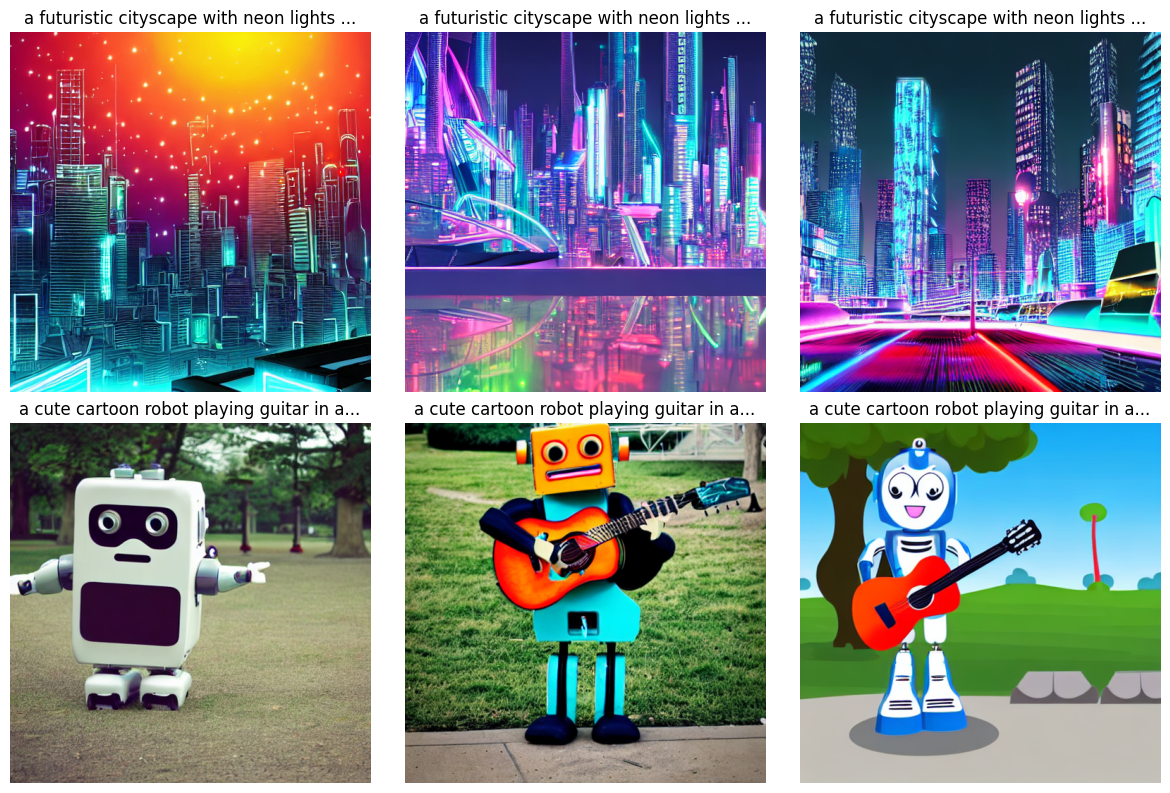

In [6]:
import matplotlib.pyplot as plt

n_show = min(6, len(all_paths))
plt.figure(figsize=(12, 8))

for i in range(n_show):
    prompt, path = all_paths[i]
    img = Image.open(path)
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(prompt[:40] + "..." if len(prompt) > 40 else prompt)

plt.tight_layout()
plt.show()


In [7]:
import os
import uuid
from PIL import Image

# Root folder for X-ray synthetic dataset
xray_root = "/content/drive/MyDrive/genai_xray_dataset"
os.makedirs(xray_root, exist_ok=True)

# Choose 4–5 diseases / classes
diseases = [
    "normal chest",
    "pneumonia",
    "tuberculosis",
    "lung cancer",
    "pulmonary edema"
]

images_per_disease = 5  # 4–5 images per disease
print("Saving X-ray style images under:", xray_root)


Saving X-ray style images under: /content/drive/MyDrive/genai_xray_dataset


In [8]:
guidance_scale = 7.5
num_inference_steps = 30

xray_paths = []

for disease in diseases:
    disease_slug = disease.replace(" ", "_").lower()
    disease_dir = os.path.join(xray_root, disease_slug)
    os.makedirs(disease_dir, exist_ok=True)

    print(f"\n=== Generating for disease: {disease} ===")

    for i in range(images_per_disease):
        prompt = (
            f"high resolution grayscale chest X-ray image, "
            f"frontal view, {disease}, medical imaging, "
            f"clean background, realistic radiology style"
        )

        image = pipe(
            prompt,
            guidance_scale=guidance_scale,
            num_inference_steps=num_inference_steps
        ).images[0]

        filename = f"{disease_slug}_{uuid.uuid4().hex}.png"
        save_path = os.path.join(disease_dir, filename)
        image.save(save_path)
        xray_paths.append((disease, prompt, save_path))
        print("  Saved:", save_path)



=== Generating for disease: normal chest ===


  0%|          | 0/30 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


  Saved: /content/drive/MyDrive/genai_xray_dataset/normal_chest/normal_chest_6d30f8f9f43d49b387aeb6bdffbae82a.png


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_xray_dataset/normal_chest/normal_chest_fc34dfdb38fb4df8998035b2cfada4a7.png


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_xray_dataset/normal_chest/normal_chest_f6b6f87cf6d24e94b0eeb080b7931994.png


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_xray_dataset/normal_chest/normal_chest_04fda335d8754fcbb80668cca52955e5.png


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_xray_dataset/normal_chest/normal_chest_fd7d011523884d949d539afae8b8c5c1.png

=== Generating for disease: pneumonia ===


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_xray_dataset/pneumonia/pneumonia_653197d59b964980aa342d7f041c597e.png


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_xray_dataset/pneumonia/pneumonia_df0067c51dde48dfbfc5f358cc72eee3.png


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_xray_dataset/pneumonia/pneumonia_c26ddbaa14ee4b759a5a6f81ab5df305.png


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_xray_dataset/pneumonia/pneumonia_c3660462e586460b8c8155c562f4444d.png


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_xray_dataset/pneumonia/pneumonia_d3f8b0c9e7554630b0bd79e6c8546aad.png

=== Generating for disease: tuberculosis ===


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_xray_dataset/tuberculosis/tuberculosis_57a97d4da6bf4f78a56fe61a7e388626.png


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_xray_dataset/tuberculosis/tuberculosis_7e50fb51494f4b0ab3f62cbbc9941715.png


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_xray_dataset/tuberculosis/tuberculosis_f2ad042e7a2f40c9a996ff064b2ec61b.png


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_xray_dataset/tuberculosis/tuberculosis_891e92a5eed94c00a9eec2fdd48eaad9.png


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_xray_dataset/tuberculosis/tuberculosis_8ee430ffda114b2d82dc27488031bfae.png

=== Generating for disease: lung cancer ===


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_xray_dataset/lung_cancer/lung_cancer_5ba51b31403f45cd867393b90f81e8c3.png


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_xray_dataset/lung_cancer/lung_cancer_c7f88622d56946399af32596da757e94.png


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_xray_dataset/lung_cancer/lung_cancer_8292e24023e949e5ad78ff30fbaea4d6.png


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_xray_dataset/lung_cancer/lung_cancer_e03c1543228a4453919720073be243b6.png


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_xray_dataset/lung_cancer/lung_cancer_e82742bebe784267ae582e14a8577800.png

=== Generating for disease: pulmonary edema ===


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_xray_dataset/pulmonary_edema/pulmonary_edema_912076ed70614a1d8593c4a3e5f840d0.png


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_xray_dataset/pulmonary_edema/pulmonary_edema_1eda14ced84c4c82a2f4cae484cdb38b.png


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_xray_dataset/pulmonary_edema/pulmonary_edema_4acedff3a20c4e738d63c06a9c412ed2.png


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_xray_dataset/pulmonary_edema/pulmonary_edema_0f836489bc9841eca95d3251461885d9.png


  0%|          | 0/30 [00:00<?, ?it/s]

  Saved: /content/drive/MyDrive/genai_xray_dataset/pulmonary_edema/pulmonary_edema_e58514b28b214c3884e186cf997afbe1.png


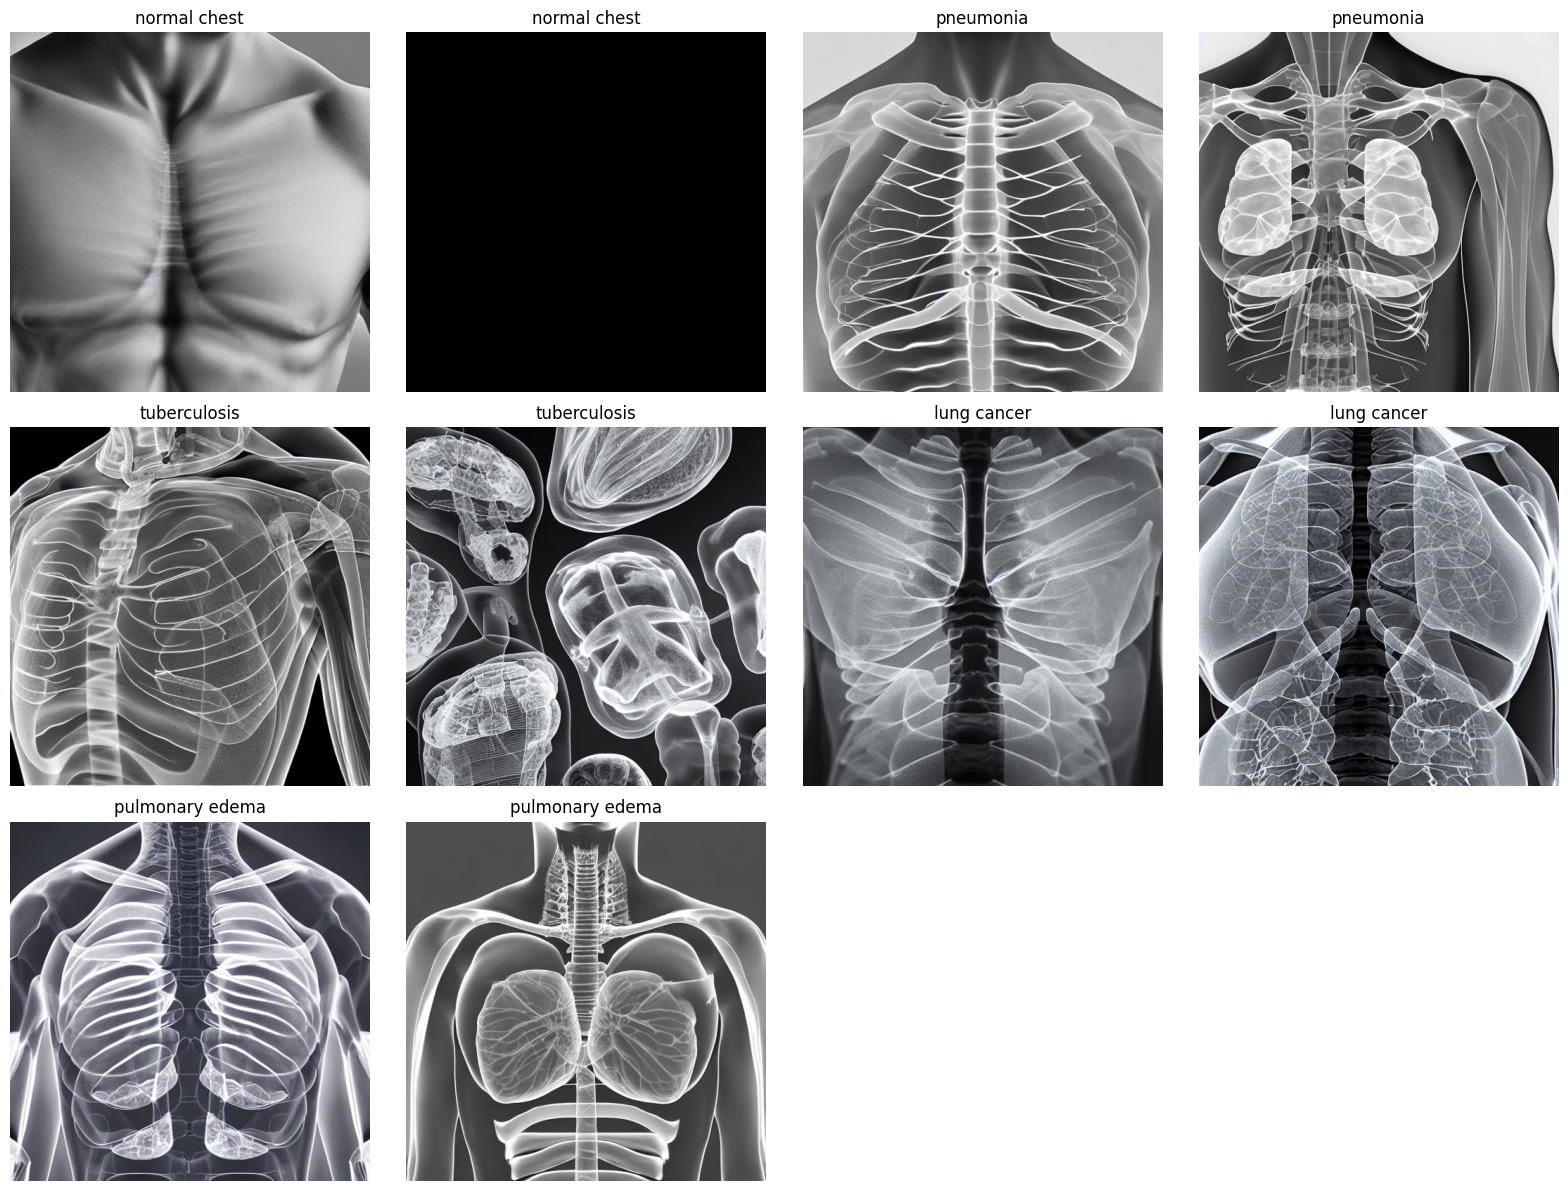

In [9]:
import random
import matplotlib.pyplot as plt

# Take up to 2 random images per disease for display
samples_per_disease = 2
to_show = []

for disease in diseases:
    items = [rec for rec in xray_paths if rec[0] == disease]
    random.shuffle(items)
    to_show.extend(items[:samples_per_disease])

n_show = len(to_show)
cols = 4
rows = (n_show + cols - 1) // cols

plt.figure(figsize=(4 * cols, 4 * rows))

for i, (disease, prompt, path) in enumerate(to_show, start=1):
    img = Image.open(path)
    plt.subplot(rows, cols, i)
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.title(disease)

plt.tight_layout()
plt.show()


In [1]:
!pip install -q torch torchvision torchaudio

import os
from PIL import Image
from sklearn.metrics import accuracy_score, f1_score
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
import os
from sklearn.model_selection import train_test_split

# Custom dataset class to handle image paths and labels after splitting
class CustomImageDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        # Use default_loader from torchvision.datasets.folder to load image
        image = datasets.folder.default_loader(img_path)
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

data_dir = "/content/drive/MyDrive/genai_xray_dataset"

batch_size = 8
img_size = 224

train_tfms = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

test_tfms = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# --- Stratified split implementation ---
# First, get all image paths and their corresponding labels
all_image_paths = []
all_labels = []

# Load the dataset once to get class names and map them to indices
full_raw_dataset = datasets.ImageFolder(root=data_dir)
class_names = full_raw_dataset.classes
class_to_idx = full_raw_dataset.class_to_idx

for class_name in class_names:
    class_path = os.path.join(data_dir, class_name)
    for img_name in os.listdir(class_path):
        if img_name.endswith(('.png', '.jpg', '.jpeg')):
            all_image_paths.append(os.path.join(class_path, img_name))
            all_labels.append(class_to_idx[class_name])

# Perform a stratified split
X_train, X_val, y_train, y_val = train_test_split(
    all_image_paths, all_labels, test_size=0.2, random_state=42, stratify=all_labels
)

# Create custom datasets for train and validation using the split paths and labels
train_dataset = CustomImageDataset(X_train, y_train, transform=train_tfms)
val_dataset = CustomImageDataset(X_val, y_val, transform=test_tfms) # Use test_tfms for validation

print("Classes:", class_names)
print(f"Total training images: {len(train_dataset)}")
print(f"Total validation images: {len(val_dataset)}")

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
device = "cuda" if torch.cuda.is_available() else "cpu"
device


Classes: ['lung_cancer', 'normal_chest', 'pneumonia', 'pulmonary_edema', 'tuberculosis']
Total training images: 40
Total validation images: 10


'cuda'

In [6]:
import torch.nn as nn
from sklearn.metrics import accuracy_score, f1_score

def train_one_model(model, model_name, num_epochs=3, lr=1e-4):
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        print(f"[{model_name}] Epoch {epoch+1}/{num_epochs}, Train loss: {epoch_loss:.4f}")

    # evaluation
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = outputs.argmax(dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average="macro")
    print(f"[{model_name}] Val Accuracy: {acc:.4f}, Macro F1: {f1:.4f}")
    return acc, f1


In [7]:
import torch.nn as nn
import torchvision.models as models

num_classes = len(class_names)

def get_resnet18():
    model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
    in_features = model.fc.in_features
    model.fc = nn.Linear(in_features, num_classes)
    return model

def get_densenet121():
    model = models.densenet121(weights=models.DenseNet121_Weights.IMAGENET1K_V1)
    in_features = model.classifier.in_features
    model.classifier = nn.Linear(in_features, num_classes)
    return model

def get_efficientnet_b0():
    model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)
    in_features = model.classifier[1].in_features
    model.classifier[1] = nn.Linear(in_features, num_classes)
    return model


In [8]:
results = {}

for name, builder in [
    ("ResNet18", get_resnet18),
    ("DenseNet121", get_densenet121),
    ("EfficientNetB0", get_efficientnet_b0),
]:
    print("\n==============================")
    print("Training model:", name)
    model = builder()
    acc, f1 = train_one_model(model, name, num_epochs=3, lr=1e-4)
    results[name] = {"accuracy": acc, "f1": f1}

print("\nModel comparison:")
for name, metrics in results.items():
    print(f"{name}: Acc={metrics['accuracy']:.4f}, F1={metrics['f1']:.4f}")



Training model: ResNet18
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 209MB/s]


[ResNet18] Epoch 1/3, Train loss: 1.7019
[ResNet18] Epoch 2/3, Train loss: 0.6245
[ResNet18] Epoch 3/3, Train loss: 0.3150
[ResNet18] Val Accuracy: 0.3000, Macro F1: 0.1667

Training model: DenseNet121
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


100%|██████████| 30.8M/30.8M [00:00<00:00, 217MB/s]


[DenseNet121] Epoch 1/3, Train loss: 1.7271
[DenseNet121] Epoch 2/3, Train loss: 1.1563
[DenseNet121] Epoch 3/3, Train loss: 0.7973
[DenseNet121] Val Accuracy: 0.3000, Macro F1: 0.2833

Training model: EfficientNetB0
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth


100%|██████████| 20.5M/20.5M [00:00<00:00, 58.5MB/s]


[EfficientNetB0] Epoch 1/3, Train loss: 1.6266
[EfficientNetB0] Epoch 2/3, Train loss: 1.4888
[EfficientNetB0] Epoch 3/3, Train loss: 1.3718
[EfficientNetB0] Val Accuracy: 0.3000, Macro F1: 0.3000

Model comparison:
ResNet18: Acc=0.3000, F1=0.1667
DenseNet121: Acc=0.3000, F1=0.2833
EfficientNetB0: Acc=0.3000, F1=0.3000
